In [3]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Reading Dataset
student_data = pd.read_csv('StudentPerformanceFactors.csv')
student_data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [4]:
# Describe numerical features
print(student_data.describe())
print()
print("Null values in dataset : ");
print();
# Check for any missing values
print(student_data.isnull().sum())

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

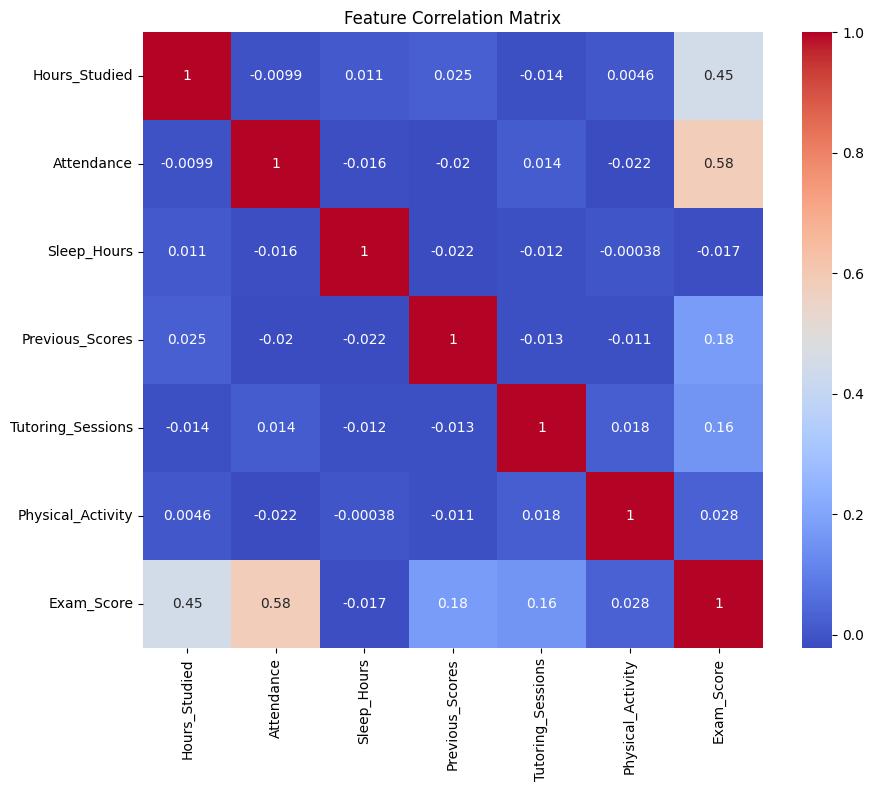

In [5]:
# Select only numerical columns for correlation matrix
numerical_data = student_data.select_dtypes(include=['float64', 'int64'])

# Plot correlations between numerical features and target
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

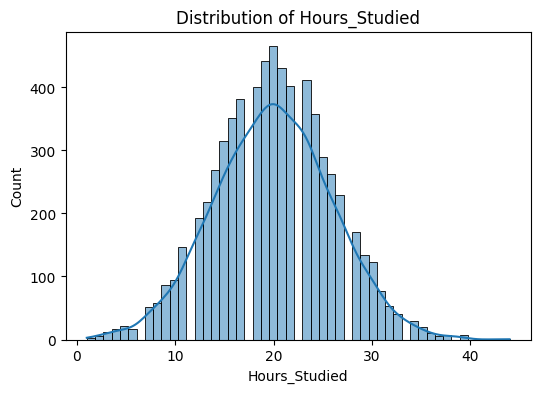

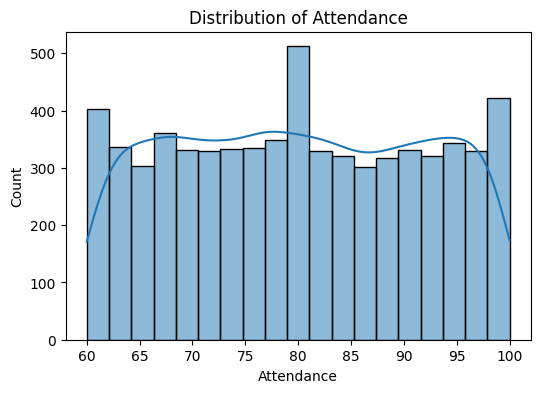

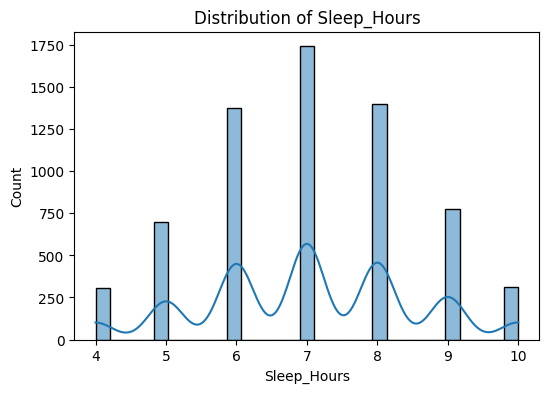

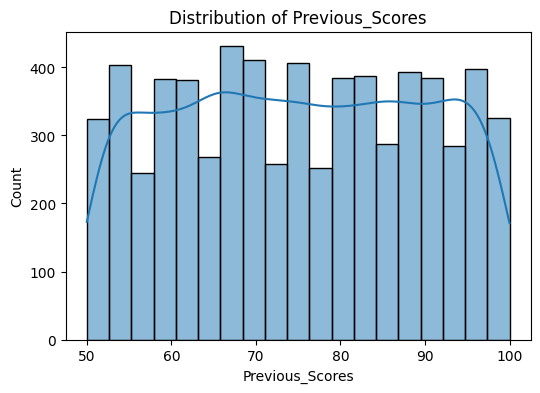

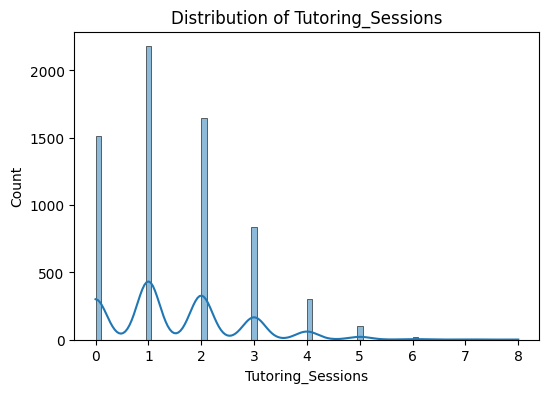

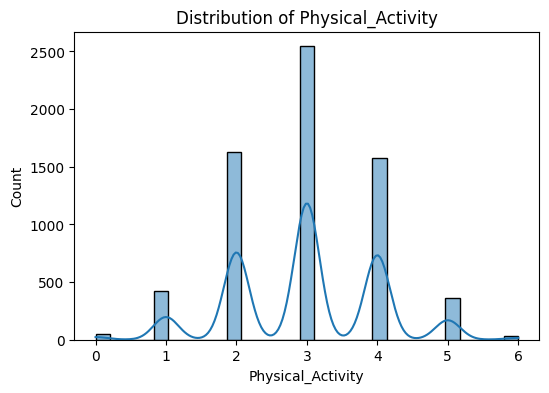

In [6]:
# Visualize distributions for numerical features
numerical_features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(student_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


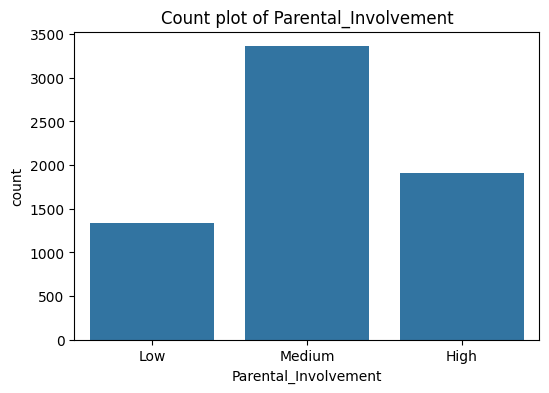

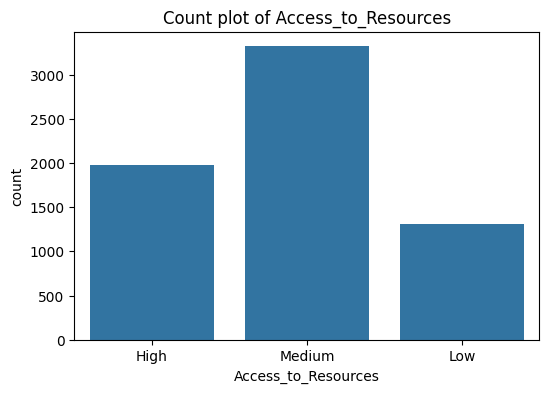

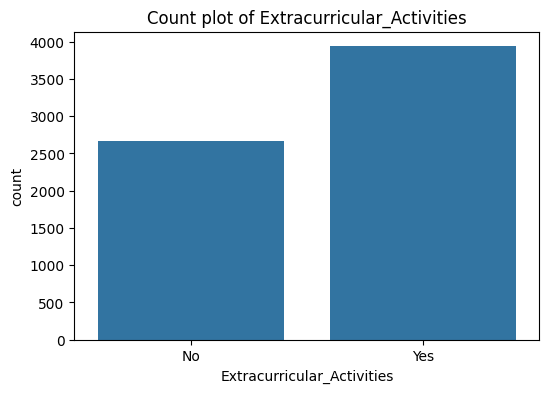

In [7]:
# Visualize categorical features
categorical_features = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, data=student_data)
    plt.title(f'Count plot of {feature}')
    plt.show()

In [8]:
#Identify numerical and categorical columns
numerical_features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
categorical_features = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities']

#Preprocessing pipelines for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [9]:
#Separate features and target variable
X = student_data.drop('Exam_Score', axis=1)
y = student_data['Exam_Score']

#Preprocess the data and fit the entire dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Preprocess the training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [10]:
#Initialize and train the Linear Regression model on the training data
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_processed, y_train)

# Evaluate the model on the test set
y_train_lr_pred = linear_regressor.predict(X_train_processed)
y_test_lr_pred = linear_regressor.predict(X_test_processed)

print("MSE (Train):", mean_squared_error(y_train, y_train_lr_pred))
print("MSE (Test):", mean_squared_error(y_test, y_test_lr_pred))
print("R^2 (Train):", r2_score(y_train, y_train_lr_pred))
print("R^2 (Test):", r2_score(y_test, y_test_lr_pred))

MSE (Train): 5.2790777281749435
MSE (Test): 4.092948616580089
R^2 (Train): 0.6567784633468707
R^2 (Test): 0.7104402100249536


In [11]:
# Apply PCA after preprocessing
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

# Initialize and train the Linear Regression model on the PCA-transformed training data
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_pca, y_train)

# Evaluate the model on the PCA-transformed test set
y_train_pca_pred = linear_regressor.predict(X_train_pca)
y_test_pca_pred = linear_regressor.predict(X_test_pca)

print("MSE (Train):", mean_squared_error(y_train, y_train_pca_pred))
print("MSE (Test):", mean_squared_error(y_test, y_test_pca_pred))
print("R^2 (Train):", r2_score(y_train, y_train_pca_pred))
print("R^2 (Test):", r2_score(y_test, y_test_pca_pred))

MSE (Train): 6.174539496485554
MSE (Test): 4.9984038284672225
R^2 (Train): 0.5985596266562526
R^2 (Test): 0.6463828651748929


In [12]:
# Initialize and train the Random Forest Regressor
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train_processed, y_train)

# Predict on the test set
y_train_rf_pred = random_forest_regressor.predict(X_train_processed)
y_test_rf_pred = random_forest_regressor.predict(X_test_processed)

# Evaluate the model
print("MSE (Train):", mean_squared_error(y_train, y_train_rf_pred))
print("MSE (Test):", mean_squared_error(y_test, y_test_rf_pred))
print("R^2 (Train):", r2_score(y_train, y_train_rf_pred))
print("R^2 (Test):", r2_score(y_test, y_test_rf_pred))

MSE (Train): 0.8430772185430463
MSE (Test): 5.184518229954613
R^2 (Train): 0.9451869676172343
R^2 (Test): 0.6332160135834234


In [19]:
222# Define function for user input and prediction
def predict_student_performance():
    # Collect input from the user for each feature in X
    user_input = {}
    print("Enter values for the following features:")

    # Loop through numerical features
    for feature in numerical_features:
        user_input[feature] = float(input(f"{feature}: "))

    # Loop through categorical features
    for feature in categorical_features:
        user_input[feature] = input(f"{feature}: ")

    # Convert user input into a DataFrame
    user_data = pd.DataFrame([user_input])

    # Preprocess the user data
    user_data_processed = preprocessor.transform(user_data)

    # Make a prediction
    predicted_score = linear_regressor.predict(user_data_processed)

    # Display the predicted score
    print(f"\nPredicted Exam Score: {predicted_score[0]:.2f}")

# Run the prediction function
predict_student_performance()



--- Random Input Prediction ---
Input Features: {'Hours_Studied': 38, 'Attendance': 99, 'Sleep_Hours': 10, 'Previous_Scores': 94, 'Tutoring_Sessions': 1, 'Physical_Activity': 6, 'Parental_Involvement': 'Medium', 'Access_to_Resources': 'Medium', 'Extracurricular_Activities': 'Yes'}
Predicted Exam Score: 76.95


In [ ]:
import random

# Define ranges for numerical features for random input generation
num_ranges = {
    'Hours_Studied': (1, 44),
    'Attendance': (60, 100),
    'Sleep_Hours': (4, 10),
    'Previous_Scores': (50, 100),
    'Tutoring_Sessions': (0, 8),
    'Physical_Activity': (0, 6)
}

# Define unique values for categorical features for random input generation
cat_choices = {
    'Parental_Involvement': ['Low', 'Medium', 'High'],
    'Access_to_Resources': ['High', 'Medium', 'Low'],
    'Extracurricular_Activities': ['No', 'Yes']
}

# Define function for user input and prediction
def predict_student_performance(numerical_inputs, categorical_inputs):
    user_input = {}
    # Combine numerical and categorical inputs
    user_input.update(numerical_inputs)
    user_input.update(categorical_inputs)

    # Convert user input into a DataFrame
    user_data = pd.DataFrame([user_input])

    # Preprocess the user data
    user_data_processed = preprocessor.transform(user_data)

    # Apply PCA transformation, consistent with how the linear_regressor was last trained
    user_data_pca = pca.transform(user_data_processed)

    # Make a prediction using the trained linear regressor (which was trained on PCA data)
    predicted_score = linear_regressor.predict(user_data_pca)

    # Display the predicted score
    print("\n--- Random Input Prediction ---")
    print(f"Input Features: {user_input}")
    print(f"Predicted Exam Score: {predicted_score[0]:.2f}")

# Generate random numerical inputs
random_numerical_inputs = {feature: random.randint(num_ranges[feature][0], num_ranges[feature][1]) for feature in numerical_features}

# Generate random categorical inputs
random_categorical_inputs = {feature: random.choice(cat_choices[feature]) for feature in categorical_features}

# Run the prediction function with random inputs
predict_student_performance(random_numerical_inputs, random_categorical_inputs)
